In [2]:
import psycopg2
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [3]:
conn = psycopg2.connect(database="apdv_project",
                        host="localhost",
                        user="postgres",
                        password="testpassword",
                        port="5432")

cursor = conn.cursor()

cursor.execute("SELECT * FROM reddit")
reddit_data = cursor.fetchall()

In [4]:
df = pd.DataFrame(reddit_data, columns = ["ID","Date","Post"])
print(df)

                             ID        Date  \
0      6750d08a6e2e1cc9b09d1940  01-01-2018   
1      6750d08a6e2e1cc9b09d1941  01-01-2018   
2      6750d08a6e2e1cc9b09d1942  01-01-2018   
3      6750d08a6e2e1cc9b09d1943  01-01-2018   
4      6750d08a6e2e1cc9b09d1944  01-01-2018   
...                         ...         ...   
21794  6750d08f6e2e1cc9b09d6e60  20-04-2019   
21795  6750d08f6e2e1cc9b09d6e61  20-04-2019   
21796  6750d08f6e2e1cc9b09d6e62  20-04-2019   
21797  6750d08f6e2e1cc9b09d6e63  20-04-2019   
21798  6750d08f6e2e1cc9b09d6e64  20-04-2019   

                                                    Post  
0      Does anyone else like taking long walks while ...  
1      Rant about anxiety meds - I've been self medic...  
2      Meditation is making me anxious I do a couple ...  
3      Need help/opinions on medication So I was prec...  
4      Strange symptom of anxiety? Since my breakdown...  
...                                                  ...  
21794  Extreme dizzine

In [5]:
df['Post'] = df['Post'].str.lower()

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


# Add custom stopwords
custom_stopwords = {"i've", "i'm", "-", "iâ€™m", "i've", "you've", "don't", "can't", "won't", "it's"}   
#stop_words.update(custom_stopwords)

import re

# Function to clean text (remove special characters)
def clean_text(text):
    # Remove non-alphabetical characters (including special characters)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Clean the entire text
df['Post'] = df['Post'].apply(clean_text)


def remove_stopwords(text):
    tokens = text.split()  # Tokenize the text (split by spaces)
    stop_words.update(custom_stopwords)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)  # Join the tokens back into a string

# Apply the function to the DataFrame column
df['Post'] = df['Post'].apply(remove_stopwords)
print(df['Post'])

[nltk_data] Downloading package stopwords to C:\Users\Binu
[nltk_data]     Jemima\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        anyone else like taking long walks snows every...
1        rant anxiety meds ive self medicating benzodia...
2        meditation making anxious couple sessions day ...
3        need helpopinions medication preciously sertra...
4        strange symptom anxiety since breakdown months...
                               ...                        
21794    extreme dizziness day anxiety attack im going ...
21795    fear pointy thingssmall micro things im ask sp...
21796    asked help didnt believe ive always nervous ki...
21797    help need someone vent relationship anxiety ye...
21798    tournament anxiety hey guys wanted information...
Name: Post, Length: 21799, dtype: object


In [7]:
df.to_csv('C:/Users/Binu Jemima/OneDrive/Desktop/output.csv', index=False)

In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<Figure size 640x480 with 0 Axes>

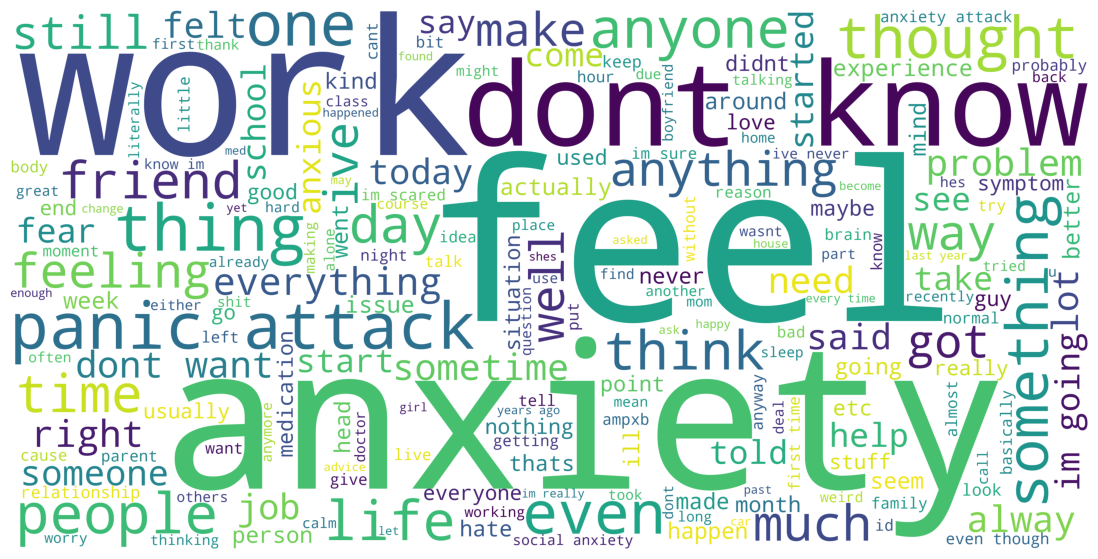

In [32]:
import matplotlib as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud_image_path = "C:/Users/Binu Jemima/OneDrive/Desktop/output.png"
fig = plt.figure()
text = " ".join(review for review in df.Post)

# Create and generate a word cloud image:
wordcloud = WordCloud(width=4000,  
    height=2000,  
    background_color="white",
    max_words=200).generate(text)

# Display the generated image:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud)
plt.axis("off")  # Disable the axis
plt.show()
fig.savefig(wordcloud_image_path, format="png", bbox_inches="tight")


In [24]:
wordcloud_image_path = "C:/Users/Binu Jemima/OneDrive/Desktop/bloop.png"
plt.savefig(wordcloud_image_path, format="png", bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [ ]:
wordcloud_image_path = "C:/Users/Binu Jemima/OneDrive/Desktop/wordcloud_image.png"